## Ähnlichkeiten berechnen
Ähnlichkeit zwischen zwei Personen anhand ihrer Fragebogen-Antworten numerisch ausdrücken 

survey_similarity(person1, person2) 

Idee: Nur nummerische Werte benutzen, alle Fragen die mit 1-5 bewertet werden konnten, sowie das Alter, Geschlecht und Studiengang

In [273]:
import numpy as np 
import pandas as pd  
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [274]:
filename = "./data/survery_data_annonymized_230626_clean.csv"
filename_cluster = "./data/survey_data_annonymized_230626_clean_clusters.csv"

data = pd.read_csv(filename)
data_cluster = pd.read_csv(filename_cluster)


In [275]:
#unwichtig, sagt nicht viel aus 
col_remove = ["Position_num",
              "Basketball",
              "Fußball",
              "Handball",
              "Football",
              "Hockey",
              "Volleyball",
              "Tennis",
              "Yoga",
              "Kampfsport",
              "Tanzen",
              "Leichtathletik",
              "Bouldern/Klettern",
              "Schwimmen",
              "Wassersport",
              "Reiten",
              "Wintersport",
              "Rennrad/Mountainbike"]

In [276]:
data

,Alter,Geschlecht,Pseudonym,Position,Studiengang,Sportlichkeit,Sportarten,Fav_Sportart,Gesunde_Ernaehrung,Essen_gehen,...,Yoga,Kampfsport,Tanzen,Leichtathletik,Bouldern/Klettern,Schwimmen,Wassersport,Reiten,Wintersport,Rennrad/Mountainbike
0,28,männlich,lalala-lololo,Student*in,MMI,4,Basketball;Yoga;Bouldern/Klettern;Rennrad/Moun...,Joggen/Laufen,4,3,...,1,0,0,0,1,0,0,0,0,1
1,26,männlich,hbstr,Student*in,MMI,3,Fußball;Volleyball;Yoga;Bouldern/Klettern;Renn...,Fußball,4,4,...,1,0,0,0,1,0,0,0,0,1
2,24,männlich,Panda,Student*in,MMI,2,Fußball;Handball;Yoga;Tanzen;Bouldern/Klettern,Keine Angabe,5,4,...,1,0,1,0,1,0,0,0,0,0
3,23,männlich,TomTom Navigation,Student*in,MMI,5,Leichtathletik;Bouldern/Klettern;Wintersport,Trampolin,2,4,...,0,0,0,1,1,0,0,0,1,0
4,24,weiblich,LcAbrgr,Student*in,MMI,3,Bouldern/Klettern,Bouldern/Klettern,4,3,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,26,männlich,Stempelliebhaber,Student*in,MMI,1,Hockey,Keine Angabe,4,4,...,0,0,0,0,0,0,0,0,0,0
58,22,männlich,Fel,Student*in,BMT,3,Fußball,Fußball,3,4,...,0,0,0,0,0,0,0,0,0,0
59,25,weiblich,PaBe28,Student*in,BMT,3,Basketball;Yoga;Schwimmen,Rudern,3,4,...,1,0,0,0,0,1,0,0,0,0
60,31,weiblich,oretani,Student*in,BMI,3,Tennis;Yoga;Kampfsport;Tanzen;Schwimmen,Padel-Tennis,4,5,...,1,1,1,0,0,1,0,0,0,0


In [277]:
from sklearn.decomposition import PCA

sportarten = data.copy()[col_remove]

pca = PCA(n_components=1)
pca.fit(sportarten) # fit meint, ich trainere/ lerne etwas
X_pca = pca.transform(sportarten)

In [278]:
data['sports_factor'] = X_pca

In [279]:
data_numerical = data.copy().select_dtypes(include='number')

data_numerical = data_numerical.drop(col_remove, axis=1)

In [280]:
data_numerical

,Alter,Sportlichkeit,Gesunde_Ernaehrung,Essen_gehen,Kochen,Feiern,Musik,Lesen,Darstellende_Kunst,Filme,...,Abgaben_spaet,Neugier_Lebensmittel,Natur,Verreisen,Handwerk,Sprachnachrichten,Wichtigkeit_Geld,Geschlecht_num,Studiengang_num,sports_factor
0,28,4,4,3,4,3,5,4,3,3,...,2,5,5,2,2,3,3,1,3,0.258068
1,26,3,4,4,5,2,4,2,3,4,...,2,4,3,3,4,3,4,1,3,0.011600
2,24,2,5,4,4,3,5,2,3,4,...,1,3,2,3,2,4,3,1,3,0.609029
3,23,5,2,4,4,2,3,3,2,4,...,3,5,4,4,2,3,3,1,3,0.585324
4,24,3,4,3,2,1,3,4,2,5,...,5,2,3,4,3,3,4,0,3,0.623931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,26,1,4,4,5,2,5,3,4,5,...,1,4,3,2,3,1,3,1,3,0.278583
58,22,3,3,4,4,3,4,1,1,2,...,3,4,3,4,4,1,5,1,2,-0.296903
59,25,3,3,4,3,2,4,4,3,3,...,4,4,5,3,4,2,2,0,2,-0.109839
60,31,3,4,5,5,3,5,4,4,5,...,2,5,4,4,3,2,3,0,0,0.669321


In [281]:
#Da war das Alter miteinbeziehen, haben wir uns dafür entschieden, die Daten zu skalieren
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(data_numerical)
print("Standardized Data:")
print(standardized_data)

Standardized Data:
[[ 0.55507333  0.72889252  0.55296675 ...  0.63960215  1.06493344
   0.4150955 ]
 [ 0.10520998 -0.2981833   0.55296675 ...  0.63960215  1.06493344
   0.01865871]
 [-0.34465337 -1.32525912  1.77739314 ...  0.63960215  1.06493344
   0.97960642]
 ...
 [-0.1197217  -0.2981833  -0.67145963 ... -1.56347192  0.13499156
  -0.17667264]
 [ 1.22986836 -0.2981833   0.55296675 ... -1.56347192 -1.7248922
   1.07658451]
 [-0.1197217  -1.32525912 -1.89588601 ...  0.63960215  0.13499156
   0.46839321]]


In [282]:
data_numerical = standardized_data

In [283]:
#Testen von Möglichkeiten, zwei Teilnehmer zu vergleichen
import numpy as np

data_array1 = data_numerical[0] 
data_array2 = data_numerical[1]

data_array1, data_array2

(array([ 0.55507333,  0.72889252,  0.55296675, -0.87119691,  0.18179956,
         0.15329615,  1.07151675,  0.72740887,  0.31412676, -0.8272525 ,
        -0.03793823, -0.82487618, -0.99179754, -0.55101405, -0.15897488,
        -0.80339695, -0.85228648,  0.07900758, -0.49562147,  0.07202824,
         0.09723056, -0.3633131 ,  1.54616461,  0.21657404,  0.49466164,
         1.48362952, -0.5875097 , -0.46883903,  0.26552513, -1.30432632,
         1.65227338, -0.62196632, -1.2282795 ,  1.04178493,  2.05039174,
        -1.        , -0.94527391,  0.28788316, -0.37563852,  0.63960215,
         1.06493344,  0.4150955 ]),
 array([ 0.10520998, -0.2981833 ,  0.55296675,  0.1479391 ,  1.20648797,
        -0.71073668,  0.        , -0.91256749,  0.31412676,  0.28774   ,
         0.74611848,  0.9386522 ,  0.45506005,  1.2470318 ,  0.93618538,
         0.82973783,  0.90910558,  0.07900758,  0.35794884,  0.07202824,
         0.09723056, -0.3633131 , -1.27331203,  0.21657404, -1.6204433 ,
         0.2235

In [284]:
from numpy.linalg import norm

cos_sim = np.dot(data_array1, data_array2)/(norm(data_array1)*norm(data_array2))

In [285]:
cos_sim

-0.1623093588391016

In [286]:
from numpy.linalg import norm

def survey_similarity(person1, person2):
    cos_sim = np.dot(person1, person2)/(norm(person1)*norm(person2))
    print(cos_sim)

#survey_similarity(data_numerical.iloc[0].to_numpy(),data_numerical.iloc[10].to_numpy())
survey_similarity(data_numerical[0],data_numerical[1])

-0.1623093588391016


In [287]:
#Ähnlichkeiten für alle Teilnehmer berechnen
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(data_numerical)

In [288]:
cosine_sim[0]

array([ 1.        , -0.16230936,  0.0474342 ,  0.12631995, -0.04027449,
        0.11463652, -0.09911218,  0.26708905, -0.07133993, -0.192074  ,
       -0.18170179, -0.31298011, -0.03906554,  0.04589853, -0.23429499,
       -0.06283562, -0.25149086, -0.23238452, -0.09531024,  0.09187223,
        0.21009689, -0.06338493, -0.13499215, -0.07984406, -0.08871043,
        0.29579961,  0.22812056,  0.09324833,  0.04928281, -0.00704702,
       -0.07302979,  0.20515222, -0.00981062, -0.06436729, -0.17368077,
        0.03385484, -0.00991977, -0.1818858 , -0.03467151, -0.10298494,
        0.04332247,  0.17540552, -0.03130429, -0.0585206 ,  0.01559389,
       -0.44494107,  0.06484283,  0.01318747, -0.06111773,  0.03951617,
        0.05491272,  0.34674478, -0.13602904, -0.25400997,  0.07665504,
        0.07229131,  0.2548735 ,  0.12736853,  0.11311301,  0.09304511,
       -0.04405597, -0.04606745])

In [289]:
grenzwert = 0.25

In [290]:
import networkx as nx

G = nx.Graph()

In [291]:
length = len(cosine_sim)
length

62

In [292]:
for p in range(cosine_sim.shape[0]):
    for i in cosine_sim[p]:
        if (i > grenzwert) and (i < 1):
            test = np.where(cosine_sim[p] == i)
            test = test[0][0]
            if(data.loc[p].Pseudonym != data.loc[test].Pseudonym):
                G.add_edge(data.loc[p].Pseudonym, data.loc[test].Pseudonym, weight=i)
                print(data.loc[p].Pseudonym, data.loc[test].Pseudonym)
        else:
            G.add_node(data.loc[p].Pseudonym, cluster=data_cluster.iloc[p]["cluster_3"])
            

lalala-lololo air-oughtest-wood-abate
lalala-lololo nomercy
lalala-lololo TV
lalala-lololo JustTill
hbstr Quantum342 (ChatGPT)
hbstr bangnon123
hbstr 7bpf8
hbstr DRP
hbstr Stempelliebhaber
Panda Heartist
Panda aw17
Panda Stempelliebhaber
TomTom Navigation 242
TomTom Navigation FB42
TomTom Navigation Moin123
TomTom Navigation hmmh
242 TomTom Navigation
242 7bpf8
242 ac1306
242 Moin123
242 TV
3186 one_more_datapoint
3186 KaHo
3186 S.R.R.
3186 TV
3186 Stempelliebhaber
air-oughtest-wood-abate lalala-lololo
air-oughtest-wood-abate Heartist
air-oughtest-wood-abate agalper
air-oughtest-wood-abate ac1306
one_more_datapoint 3186
one_more_datapoint Quantum342 (ChatGPT)
one_more_datapoint 123
one_more_datapoint kevkev
one_more_datapoint Ysaja
one_more_datapoint asdf
Quantum342 (ChatGPT) hbstr
Quantum342 (ChatGPT) one_more_datapoint
Quantum342 (ChatGPT) 123
Quantum342 (ChatGPT) mava
Quantum342 (ChatGPT) oretani
2111 AOoOA
2111 5714
2111 Tobbi
Ismail eprotizu
Ismail 420
Ismail yeet
Ismail SugarDadd

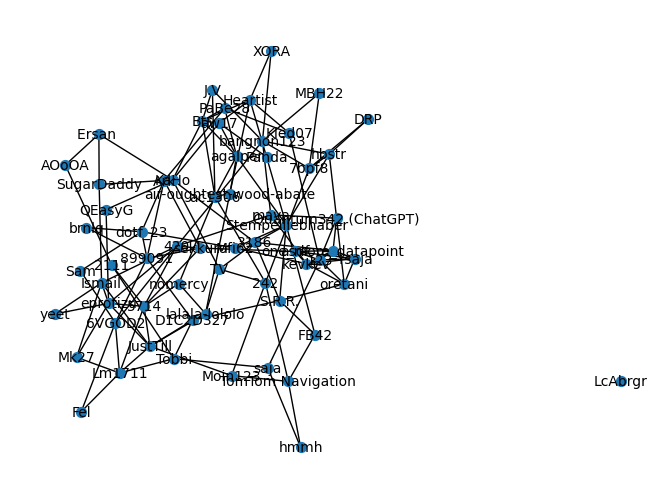

In [293]:
nx.draw(G,
        with_labels=True,
        font_size=10,
        node_size=50)

In [297]:
G.number_of_nodes()

62

In [299]:
G.number_of_edges()

135

In [301]:
G.degree()

DegreeView({'lalala-lololo': 4, 'air-oughtest-wood-abate': 4, 'nomercy': 3, 'TV': 4, 'JustTill': 7, 'hbstr': 5, 'Quantum342 (ChatGPT)': 5, 'bangnon123': 7, '7bpf8': 5, 'DRP': 2, 'Stempelliebhaber': 7, 'Panda': 3, 'Heartist': 6, 'aw17': 5, 'TomTom Navigation': 4, '242': 5, 'FB42': 3, 'Moin123': 3, 'hmmh': 2, 'LcAbrgr': 0, 'ac1306': 6, '3186': 5, 'one_more_datapoint': 6, 'KaHo': 7, 'S.R.R.': 5, 'agalper': 6, '123': 8, 'kevkev': 7, 'Ysaja': 5, 'asdf': 5, 'mava': 4, 'oretani': 5, '2111': 3, 'AOoOA': 2, '5714': 7, 'Tobbi': 4, 'Ismail': 6, 'eprotizu': 7, '420': 7, 'yeet': 2, 'SugarDaddy': 3, 'Mk27': 3, 'MBH22': 2, 'XORA': 2, 'J.V': 3, 'QEasyG': 2, 'sekkuro': 5, '899091': 6, 'Ark': 4, '6VGOD2': 5, 'saja': 3, 'Kled07': 3, 'Ersan ': 3, 'Btr': 7, 'dotf_23': 5, 'brnlq': 2, 'Sam': 2, 'Mfi62': 3, 'Lm1711': 6, 'PaBe28': 4, 'Fel': 2, 'D1C2D327': 4})

In [303]:
nx.density(G)

0.07139079851930195

In [251]:
centrality_betweenness = nx.betweenness_centrality(G)

In [252]:
pd.DataFrame(centrality_betweenness.items()).sort_values(by=[1], ascending=False)

,0,1
38,420,0.130739
7,bangnon123,0.103105
10,Stempelliebhaber,0.094124
23,KaHo,0.092701
4,JustTill,0.086005
...,...,...
42,MBH22,0.000000
55,brnlq,0.000000
9,DRP,0.000000
39,yeet,0.000000


In [308]:
edge_betweenness = nx.edge_betweenness_centrality(G)

In [309]:
pd.DataFrame(edge_betweenness.items()).sort_values(by=[1], ascending=False)

,0,1
27,"(bangnon123, 420)",0.075035
74,"(S.R.R., D1C2D327)",0.046105
113,"(420, 6VGOD2)",0.044056
63,"(3186, KaHo)",0.044039
77,"(123, saja)",0.042044
...,...,...
67,"(one_more_datapoint, Ysaja)",0.006860
84,"(kevkev, Ysaja)",0.006778
50,"(aw17, Btr)",0.006276
89,"(Ysaja, oretani)",0.004946


In [260]:
partitions = nx.community.girvan_newman(G)
partitions

<generator object girvan_newman at 0x7f9ecc70fc10>

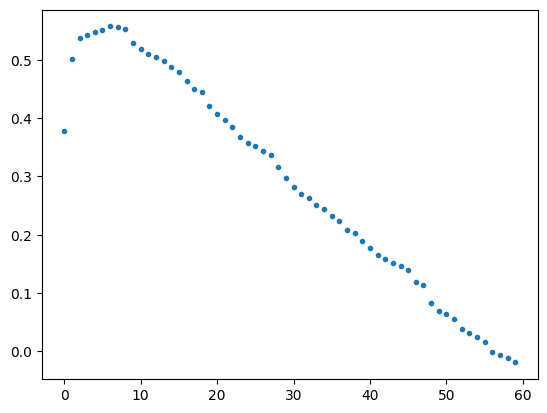

In [310]:
partitions = nx.community.girvan_newman(G)
best_modularity = -1
modularities = []
for partition in partitions:
    modularity = nx.community.quality.modularity(G, partition)
    if modularity > best_modularity:
        best_modularity = modularity
        best_partition = partition
    modularities.append(modularity)


plt.plot(modularities, ".")

In [311]:
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

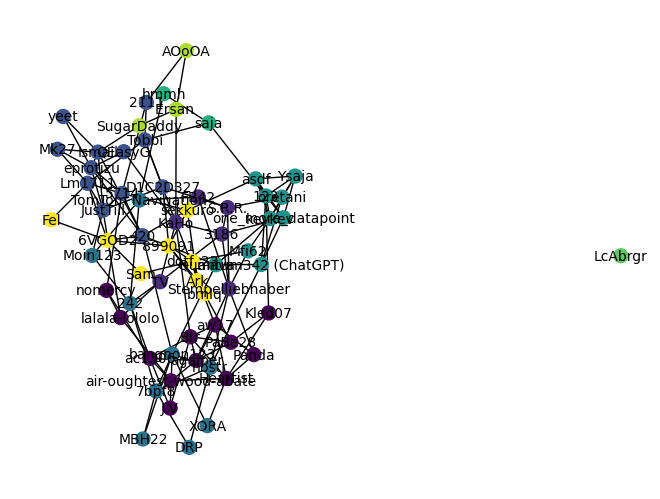

In [312]:
pos = nx.layout.spring_layout(G, k=0.1, seed=123)

best_partition_map = create_partition_map(best_partition)

node_colors = [best_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors,
       pos=pos,font_size=10,node_size=100)

In [313]:
nx.write_graphml_lxml(G, "./data/graph.graphml")

## StudentMatcher

Hier alle Werte miteinbeziehen, der Grenzwert ist egal, es werden die 5 höchsten Werte für jeden Teilnehmer gesucht.

In [314]:
sorted_indices = []
for p in range(cosine_sim.shape[0]):
    sorted_indices.append(np.argsort(cosine_sim[p])[::-1])

In [315]:
sorted_indices

[array([ 0, 51, 25,  7, 56, 26, 20, 31, 41, 57,  3,  5, 58, 27, 59, 19, 54,
        55, 46, 50, 28,  2, 13, 40, 49, 35, 44, 47, 29, 32, 36, 42, 38, 12,
         4, 60, 61, 43, 48, 15, 21, 33,  8, 30, 23, 24, 18,  6, 39, 22, 52,
         1, 34, 10, 37,  9, 17, 14, 16, 53, 11, 45]),
 array([ 1, 48, 21, 12, 57,  9, 51, 23, 34,  5, 60,  8,  6,  2, 17, 24, 38,
        37, 53, 42, 15, 41, 11,  3, 45, 43, 35, 36, 16, 31, 10, 50, 55, 30,
        39, 54, 13, 40, 27, 14, 58, 29, 18,  7, 49, 46, 26, 22, 28, 59,  0,
        52, 47, 56, 20, 32, 44, 61, 25, 33, 19,  4]),
 array([ 2, 57, 38, 18, 51, 35, 44, 41, 12, 60, 28, 55,  1, 37, 10, 21, 29,
        26, 40, 52, 16, 36, 50,  0, 27, 30, 43,  5, 45,  7, 20, 42,  9, 31,
        17, 23,  6, 25,  8, 48, 24, 32, 46, 19, 49, 58, 56, 14,  4, 47, 15,
        61, 22, 34, 53, 39, 54,  3, 59, 13, 33, 11]),
 array([ 3,  5, 20, 40, 32, 56, 46, 42, 25, 54, 51,  0, 11, 13, 53, 24, 21,
        33,  7,  4,  1, 58, 22, 28, 34,  8, 36, 61, 59, 57, 41,  9, 30, 15,
  

In [316]:
type(test)
indices_array = np.array(sorted_indices)

In [317]:
fuenf_freunde = []
freundesliste = []

for indices_array in sorted_indices:
    fuenf_freunde.append(indices_array[1:6])
    fuenf_freunde_array = np.array(fuenf_freunde)
    
for row in range(fuenf_freunde_array.shape[0]): 
    for element in fuenf_freunde_array[row]:
        freundesliste.append([data.iloc[row].Pseudonym,data.iloc[element].Pseudonym])

In [318]:
freundesliste

[['lalala-lololo', 'TV'],
 ['lalala-lololo', 'nomercy'],
 ['lalala-lololo', 'air-oughtest-wood-abate'],
 ['lalala-lololo', 'JustTill'],
 ['lalala-lololo', 'agalper'],
 ['hbstr', 'DRP'],
 ['hbstr', '7bpf8'],
 ['hbstr', 'bangnon123'],
 ['hbstr', 'Stempelliebhaber'],
 ['hbstr', 'Quantum342 (ChatGPT)'],
 ['Panda', 'Stempelliebhaber'],
 ['Panda', 'aw17'],
 ['Panda', 'Heartist'],
 ['Panda', 'TV'],
 ['Panda', 'KaHo'],
 ['TomTom Navigation', '242'],
 ['TomTom Navigation', 'FB42'],
 ['TomTom Navigation', 'hmmh'],
 ['TomTom Navigation', 'Moin123'],
 ['TomTom Navigation', 'JustTill'],
 ['LcAbrgr', 'nomercy'],
 ['LcAbrgr', 'D1C2D327'],
 ['LcAbrgr', 'Mfi62'],
 ['LcAbrgr', '6VGOD2'],
 ['LcAbrgr', 'JustTill'],
 ['242', '7bpf8'],
 ['242', 'TomTom Navigation'],
 ['242', 'Moin123'],
 ['242', 'ac1306'],
 ['242', 'TV'],
 ['3186', 'S.R.R.'],
 ['3186', 'KaHo'],
 ['3186', 'Stempelliebhaber'],
 ['3186', 'TV'],
 ['3186', 'one_more_datapoint'],
 ['air-oughtest-wood-abate', 'agalper'],
 ['air-oughtest-wood-abate

In [319]:
#DataFrame erstellen, mit der Liste der Pseudonymen und ihren zugeordneten Freunden
data_freunde = pd.DataFrame(freundesliste, columns=["Name", "Freunde"])

print(data_freunde)

              Name                  Freunde
0    lalala-lololo                       TV
1    lalala-lololo                  nomercy
2    lalala-lololo  air-oughtest-wood-abate
3    lalala-lololo                 JustTill
4    lalala-lololo                  agalper
..             ...                      ...
305       D1C2D327                   899091
306       D1C2D327                    Tobbi
307       D1C2D327                   S.R.R.
308       D1C2D327                 JustTill
309       D1C2D327                   PaBe28

[310 rows x 2 columns]


In [320]:
data_freunde.to_csv("./data/data_freunde.csv", sep=',')

In [321]:
filename = "./data/data_freunde.csv"

data = pd.read_csv(filename)

In [322]:
data

,Unnamed: 0,Name,Freunde
0,0,lalala-lololo,TV
1,1,lalala-lololo,nomercy
2,2,lalala-lololo,air-oughtest-wood-abate
3,3,lalala-lololo,JustTill
4,4,lalala-lololo,agalper
...,...,...,...
305,305,D1C2D327,899091
306,306,D1C2D327,Tobbi
307,307,D1C2D327,S.R.R.
308,308,D1C2D327,JustTill
